
***-------------------------------------Diabetes detection classification task------------------------------------------***

#Report for the project

This project focuses on the classification of diabetes using various machine learning algorithms. Our dataset had a significant imbalance in the target class, which was addressed using SMOTE (Synthetic Minority Over-sampling Technique). To preprocess the data, we applied label encoding to convert categorical features to numerical and used StandardScaler for feature scaling. Additionally, Principal Component Analysis (PCA) was implemented to reduce dimensionality and compare performance with both built-in and custom PCA functions.

We evaluated the following machine learning models:

Random Forest ,
Decision Tree ,
Logistic Regression ,
Support Vector Machine (SVM) ,
K-Nearest Neighbors (KNN) .
 Additionally, Naive Bayes was explored, but it underperformed due to its limitations with complex data.

***PCA Comparison:***
We implemented two versions of PCA:

Built-in PCA function: This method showed a test accuracy of ***97.4%*** with Random Forest and ***97.2%*** with Decision Tree.
Custom PCA function: While we expected similar results, the custom function yielded significantly lower test accuracy for all models, with Random Forest achieving ***82%*** and Decision Tree ***77%***. The reduced performance can be attributed to either suboptimal handling of variance or numerical stability issues in the custom function. ***This demonstrates the importance of using robust, well-optimized libraries for high-dimensional datasets like this one.***

***Key Findings:***
Random Forest achieved the highest test accuracy of ***97.4%***, followed closely by Decision Tree at ***97.2%***. The strong performance of Random Forest is due to its ensemble nature and ability to handle complex feature interactions.
Logistic Regression and SVM had lower accuracies (around ***88%***), which is reasonable for these models when handling complex data.
KNN performed well with ***93%*** accuracy, while Naive Bayes had the lowest performance, likely due to its simplistic assumptions not holding well in this dataset.

***Medical Dataset Considerations:***
In medical applications, recall is a critical metric, as it measures the model’s ability to correctly identify positive cases. Both Random Forest and Decision Tree had the highest recall scores, making them ideal candidates for this classification task. Given that medical datasets often require identifying as many true positives as possible, these models are the most suitable.



***Conclusion:***
While the custom PCA function underperformed, the overall analysis shows that Random Forest and Decision Tree are the best models for this task, especially given the importance of recall in medical datasets. These models excel in identifying positive cases, making them invaluable tools in healthcare applications.

#import needed libraries

In [47]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


#read the dataset

In [48]:
data = pd.read_csv('diabetes_prediction_dataset.csv')

In [49]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


#data analysis

In [50]:
data.shape

(100000, 9)

In [51]:
data.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
smoking_history,object
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64


In [52]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [53]:
#check nulls
data.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >, <Axes: >]],
      dtype=object)

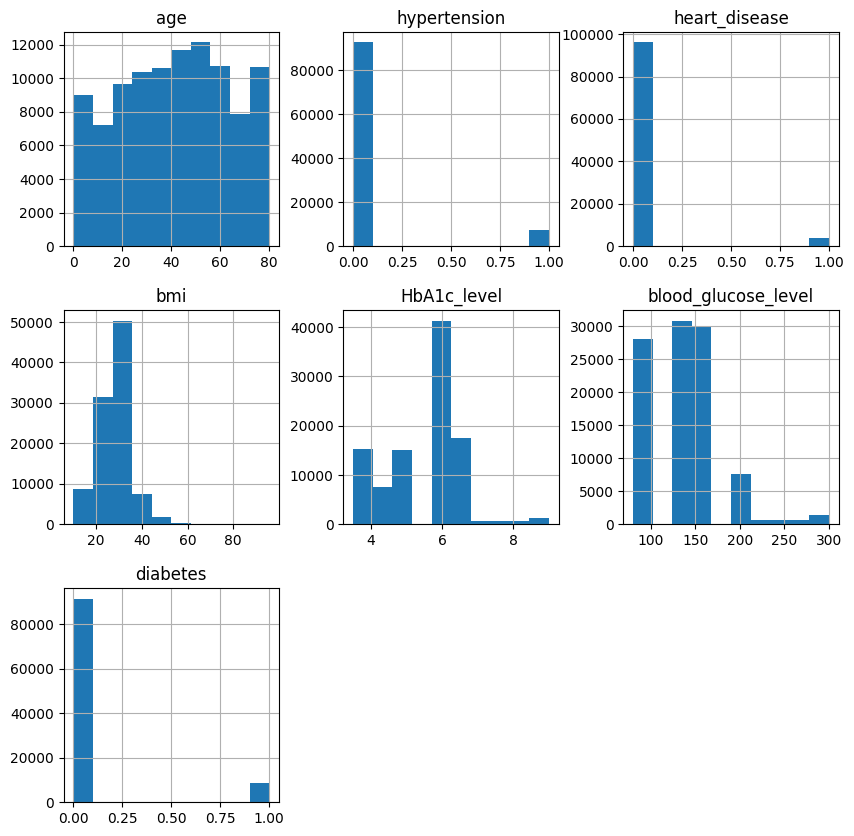

In [54]:
#histogram for all data
data.hist(figsize=(10,10))

In [55]:
data['diabetes'].value_counts()

,count
diabetes,
0,91500
1,8500


#prepare data (label encoding , resampling)

the dataset is not balanced so we need to resample it

used label encoder to handle categorical data

In [56]:
label_encoder = LabelEncoder()


In [57]:
data['gender_encoded'] = label_encoder.fit_transform(data['gender'])
data['smoking_history_encoded'] = label_encoder.fit_transform(data['smoking_history'])



In [165]:
x=data.drop(['gender','smoking_history','diabetes'],axis=1)
y=data['diabetes']

solve the imbalance between data by smote

In [166]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)


In [167]:
X_resampled

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_encoded,smoking_history_encoded
0,80.000000,0,1,25.190000,6.600000,140,0,4
1,54.000000,0,0,27.320000,6.600000,80,0,0
2,28.000000,0,0,27.320000,5.700000,158,1,4
3,36.000000,0,0,23.450000,5.000000,155,0,1
4,76.000000,1,1,20.140000,4.800000,155,1,1
...,...,...,...,...,...,...,...,...
182995,59.503975,1,1,28.064037,6.401590,155,0,3
182996,80.000000,0,0,29.462296,6.489903,159,0,4
182997,65.671103,0,0,27.458384,8.865779,200,0,4
182998,70.170151,0,0,37.724239,6.207462,280,0,3


In [168]:
y_resampled

,diabetes
0,0
1,0
2,0
3,0
4,0
...,...
182995,1
182996,1
182997,1
182998,1


<Axes: >

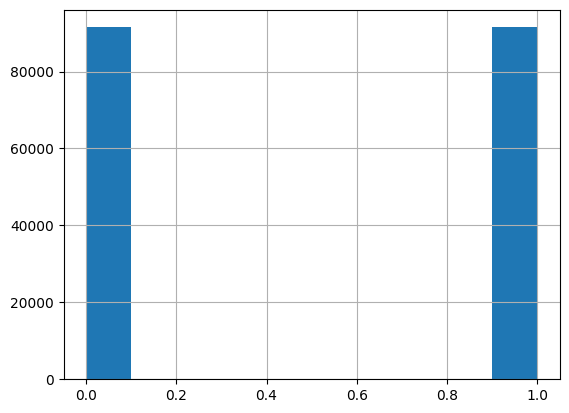

In [203]:
y_resampled.hist()

#RandomForestClassifier

In [169]:
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [170]:
#standardscaler
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)


In [171]:
# apply PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

In [172]:
#random forest
classifier = RandomForestClassifier(n_estimators = 50, max_depth=100, criterion = 'entropy', random_state = 42)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, n_estimators=50,
                       random_state=42)

In [173]:
# train and test accuracy
print("Train Accuracy :", classifier.score(x_train, y_train))
print("Test Accuracy :", classifier.score(x_test, y_test))

Train Accuracy : 0.9995013661202186
Test Accuracy : 0.9741530054644809


In [174]:
#classification report
y_pred = classifier.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     18293
           1       0.98      0.97      0.97     18307

    accuracy                           0.97     36600
   macro avg       0.97      0.97      0.97     36600
weighted avg       0.97      0.97      0.97     36600



In [175]:
#confusion matrix




cm = confusion_matrix(y_test, y_pred)
cm

array([[17852,   441],
       [  505, 17802]])

<Axes: >

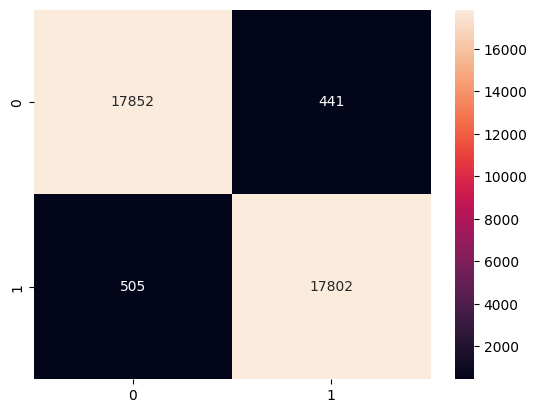

In [176]:
#plot confusion matrix for RandomForest
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')


In [72]:
#print f1 score
f1_score(y_test, y_pred)

0.9741176470588235

In [73]:
#print recall
recall_score(y_test, y_pred)

0.9724149232534003

In [74]:
#print precision
precision_score(y_test, y_pred)

0.975826344351258

In [75]:
#compare actual and predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
180328,1,1
573,0,0
13494,0,0
93981,0,0
75389,0,0
...,...,...
115976,1,1
70132,0,0
121630,1,1
172558,1,1


#LogisticRegression

In [26]:
#logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)

model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [27]:
#accuracy
print("Train Accuracy :", model.score(x_train, y_train))
print("Test Accuracy :", model.score(x_test, y_test))

Train Accuracy : 0.8869603825136612
Test Accuracy : 0.8854098360655738


In [28]:
#classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89     18293
           1       0.88      0.89      0.89     18307

    accuracy                           0.89     36600
   macro avg       0.89      0.89      0.89     36600
weighted avg       0.89      0.89      0.89     36600



In [29]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
180328,1,1
573,0,0
13494,0,0
93981,0,0
75389,0,0
...,...,...
115976,1,1
70132,0,0
121630,1,1
172558,1,1


<Axes: >

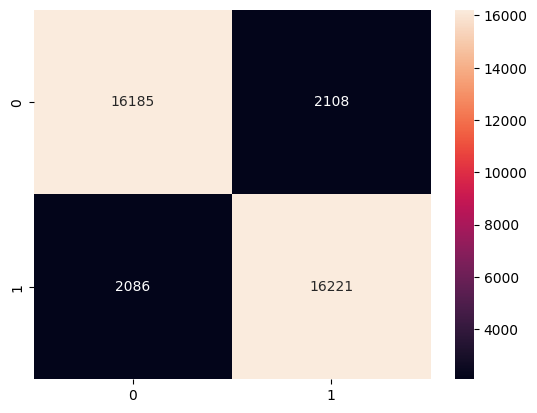

In [30]:
#plot confusion matrix for LogisticRegression
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='g')


In [31]:
print(recall_score(y_test, y_test_pred))
print(precision_score(y_test, y_test_pred))
print(f1_score(y_test, y_test_pred))

0.886054514666521
0.8849909978722243
0.8855224369472651


#DecisionTreeClassifier

In [76]:
#apply decision tree
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=50)

# Fit the classifier to the training data
dt_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(x_test)

In [77]:
#accuracy
print("Train Accuracy :", dt_classifier.score(x_train, y_train))
print("Test Accuracy :", dt_classifier.score(x_test, y_test))

Train Accuracy : 0.9995355191256831
Test Accuracy : 0.9721584699453552


In [78]:
#classifiction report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18293
           1       0.97      0.97      0.97     18307

    accuracy                           0.97     36600
   macro avg       0.97      0.97      0.97     36600
weighted avg       0.97      0.97      0.97     36600



<Axes: >

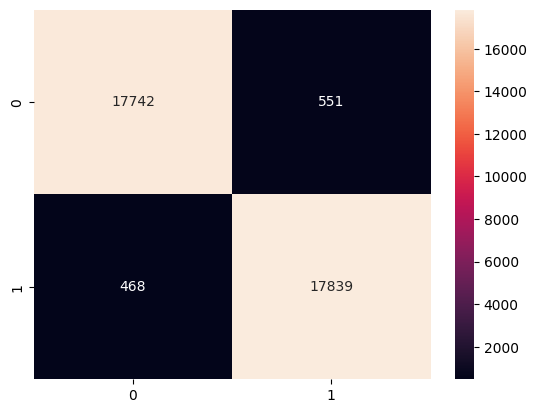

In [79]:
#plot confusion matrix for DTC
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')


In [80]:
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9744360080843393
0.9700380641653072
0.9722320625664223


#SVM

In [ ]:
from sklearn.svm import SVC

svm=SVC(kernel='linear',C=1,random_state=42)
svm.fit(x_train,y_train)

SVC(C=1, kernel='linear', random_state=42)

In [ ]:
#accuracy
print("Train Accuracy :", svm.score(x_train, y_train))
print("Test Accuracy :", svm.score(x_test, y_test))

Train Accuracy : 0.8867281420765027
Test Accuracy : 0.8848633879781421


In [ ]:
#y_pred for svm
y_pred = svm.predict(x_test)

In [ ]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89     18293
           1       0.89      0.88      0.88     18307

    accuracy                           0.88     36600
   macro avg       0.88      0.88      0.88     36600
weighted avg       0.88      0.88      0.88     36600

              precision    recall  f1-score   support

           0       0.88      0.89      0.89     18293
           1       0.89      0.88      0.88     18307

    accuracy                           0.88     36600
   macro avg       0.88      0.88      0.88     36600
weighted avg       0.88      0.88      0.88     36600



#KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier
KNNmodel=KNeighborsClassifier(n_neighbors=5, leaf_size=50)
KNNmodel.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=50)

In [82]:
#accuracuy

print("Train Accuracy :", KNNmodel.score(x_train, y_train))
print("Test Accuracy :", KNNmodel.score(x_test, y_test))

Train Accuracy : 0.9536612021857923
Test Accuracy : 0.93275956284153


In [83]:
#y_pred
y_pred = KNNmodel.predict(x_test)

In [84]:
#classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     18293
           1       0.91      0.96      0.93     18307

    accuracy                           0.93     36600
   macro avg       0.93      0.93      0.93     36600
weighted avg       0.93      0.93      0.93     36600



<Axes: >

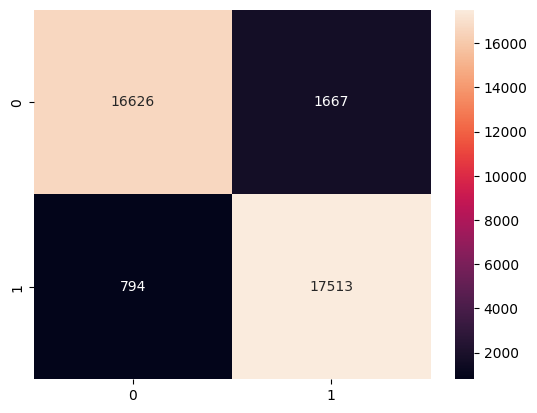

In [85]:
#plot confusion matrix for KNN
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')


#naive_bayes

In [86]:
from sklearn.naive_bayes import BernoulliNB
nb= BernoulliNB()
nb.fit(x_train,y_train)

BernoulliNB()

In [87]:
y_pred = nb.predict(x_test)

In [88]:
#accuracy
print("Train Accuracy :", nb.score(x_train, y_train))
print("Test Accuracy :", nb.score(x_test, y_test))

Train Accuracy : 0.8248565573770492
Test Accuracy : 0.8197267759562842


#Compare the built-in PCA with another one from scratch

Now we will compare the result between the built-in PCA function with another one from scrtach with RandomForest classifier , DecesionTree, KNN

In [178]:
X=data.drop(['gender','smoking_history','diabetes'],axis=1)
y=data['diabetes']

In [179]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [180]:
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)


In [181]:
ss= StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [182]:
import numpy as np
def FunPCA(X, num_components):
    # Step-1: Mean centering the data
    X_meaned = X - np.mean(X, axis=0)

    # Step-2: Calculating the covariance matrix of the mean-centered data
    cov_mat = np.cov(X_meaned, rowvar=False)

    # Step-3: Calculating the eigenvalues and eigenvectors of the covariance matrix
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

    # Step-4: Sorting the eigenvalues and eigenvectors in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalues = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]

    # Step-5: Selecting a subset of the eigenvectors (principal components)
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]

    # Step-6: Transforming the data (projecting it onto the principal components)
    X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()

    return X_reduced


In [183]:
x_train = FunPCA(x_train, num_components=4)
x_test = FunPCA(x_test, num_components=4)

RandomForest

In [189]:

classifier = RandomForestClassifier(n_estimators = 50, max_depth=50, criterion = 'entropy', random_state = 42)
classifier.fit(x_train, y_train)# train and test accuracy
print("Train Accuracy :", classifier.score(x_train, y_train))
print("Test Accuracy :", classifier.score(x_test, y_test))

Train Accuracy : 0.9993852459016394
Test Accuracy : 0.820136612021858


In [190]:
#classification report
y_pred = classifier.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.84     18293
           1       0.91      0.72      0.80     18307

    accuracy                           0.82     36600
   macro avg       0.83      0.82      0.82     36600
weighted avg       0.83      0.82      0.82     36600



<Axes: >

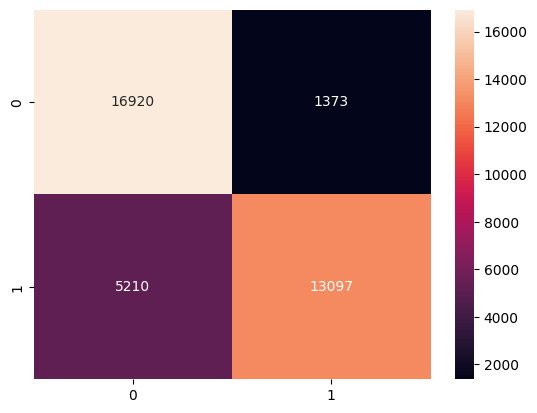

In [191]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')


DecesionTree

In [192]:
#apply decision tree
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=50)

# Fit the classifier to the training data
dt_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(x_test)

In [193]:
#accuracy
print("Train Accuracy :", dt_classifier.score(x_train, y_train))
print("Test Accuracy :", dt_classifier.score(x_test, y_test))

Train Accuracy : 0.9995355191256831
Test Accuracy : 0.7739344262295081


In [194]:
#classification report
y_pred = dt_classifier.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79     18293
           1       0.84      0.68      0.75     18307

    accuracy                           0.77     36600
   macro avg       0.78      0.77      0.77     36600
weighted avg       0.78      0.77      0.77     36600



<Axes: >

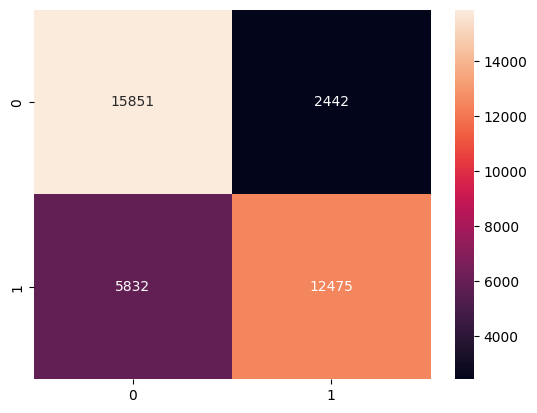

In [195]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')


In [184]:
#accuracuy
from sklearn.neighbors import KNeighborsClassifier
KNNmodel=KNeighborsClassifier(n_neighbors=5, leaf_size=50)
KNNmodel.fit(x_train,y_train)
print("Train Accuracy :", KNNmodel.score(x_train, y_train))
print("Test Accuracy :", KNNmodel.score(x_test, y_test))

Train Accuracy : 0.9376161202185792
Test Accuracy : 0.8113387978142077


In [187]:
#classification report
y_pred = KNNmodel.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83     18293
           1       0.88      0.73      0.79     18307

    accuracy                           0.81     36600
   macro avg       0.82      0.81      0.81     36600
weighted avg       0.82      0.81      0.81     36600



<Axes: >

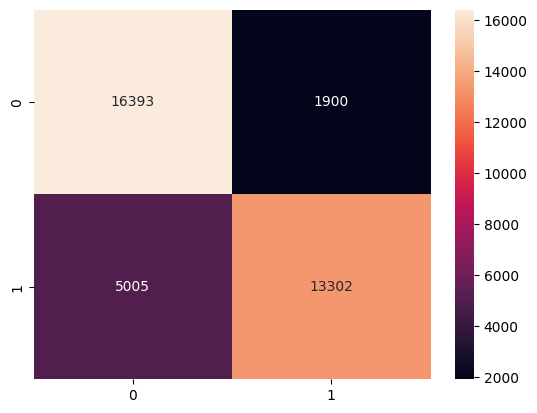

In [188]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')


#plots to compare the results

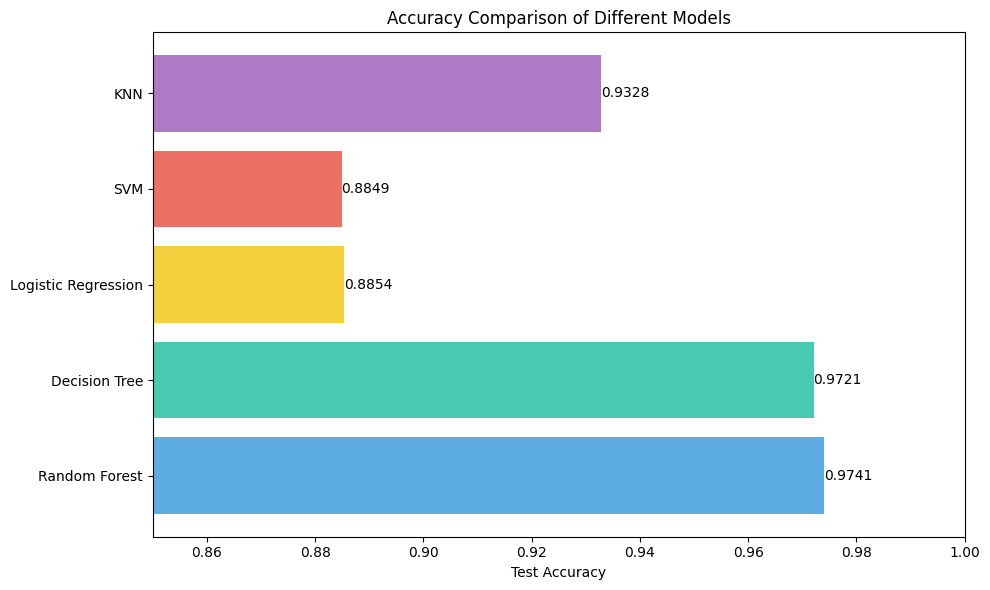

In [199]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'SVM', 'KNN']
accuracies = [0.9741, 0.9721, 0.8854, 0.8849, 0.9328]

plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color=['#5DADE2', '#48C9B0', '#F4D03F', '#EC7063', '#AF7AC5'])
plt.xlabel('Test Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.xlim([0.85, 1.0])
for index, value in enumerate(accuracies):
    plt.text(value, index, f'{value:.4f}', va='center')

plt.tight_layout()
plt.show()


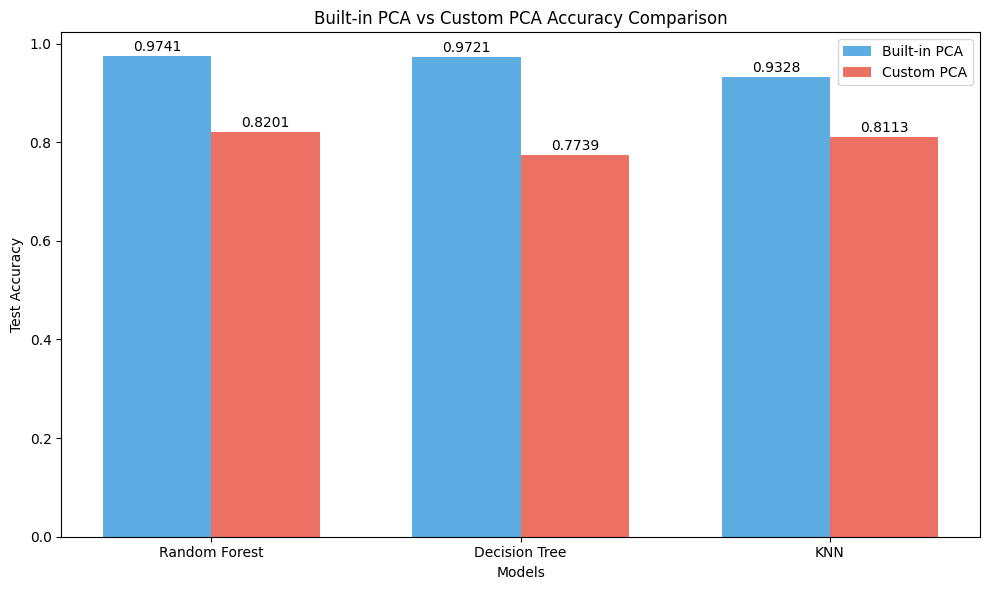

In [197]:
# PCA comparison data
pca_types = ['Built-in PCA', 'Custom PCA']
model_pca_acc = {
    'Random Forest': [0.9741, 0.8201],
    'Decision Tree': [0.9721, 0.7739],
    'KNN': [0.9328, 0.8113]
}

# Plotting
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(model_pca_acc))

# Bar positions for each PCA type
plt.bar(index, [model_pca_acc[model][0] for model in model_pca_acc], bar_width, label='Built-in PCA', color='#5DADE2')
plt.bar(index + bar_width, [model_pca_acc[model][1] for model in model_pca_acc], bar_width, label='Custom PCA', color='#EC7063')

# Labels, title
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Built-in PCA vs Custom PCA Accuracy Comparison')
plt.xticks(index + bar_width / 2, list(model_pca_acc.keys()))
plt.legend()

# Display values on bars
for i, (built_acc, custom_acc) in enumerate(zip([model_pca_acc[model][0] for model in model_pca_acc], [model_pca_acc[model][1] for model in model_pca_acc])):
    plt.text(i, built_acc + 0.01, f'{built_acc:.4f}', ha='center')
    plt.text(i + bar_width, custom_acc + 0.01, f'{custom_acc:.4f}', ha='center')

plt.tight_layout()
plt.show()
